# Рубежный контроль №1
## Котова А.А. ИУ5-61Б Вариант №7

Задача №1.
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель. Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./googleplaystore.csv", sep=',')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Преобразовываем значения в колонке Reviews в float, если это возможно, иначе удаляем строку
data['Reviews'] = data['Reviews'].apply(lambda x: float(x) if str(x).isdigit() else None)

# Преобразовываем значения в колонке Price в float, если это возможно, иначе удаляем строку
data['Price'] = data['Price'].apply(lambda x: float(x) if str(x).isdigit() else None)

# Удаляем строки, в которых Reviews или Price имеют значение None
data = data.dropna(subset=['Reviews', 'Price'])

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10040 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10040 non-null  object 
 1   Category        10040 non-null  object 
 2   Rating          8719 non-null   float64
 3   Reviews         10040 non-null  float64
 4   Size            10040 non-null  object 
 5   Installs        10040 non-null  object 
 6   Type            10039 non-null  object 
 7   Price           10040 non-null  float64
 8   Content Rating  10040 non-null  object 
 9   Genres          10040 non-null  object 
 10  Last Updated    10040 non-null  object 
 11  Current Ver     10034 non-null  object 
 12  Android Ver     10039 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [7]:
data.describe()

,Rating,Reviews,Price
count,8719.000000,1.004000e+04,10040.0
mean,4.186203,4.786134e+05,0.0
std,0.512338,3.039342e+06,0.0
min,1.000000,0.000000e+00,0.0
25%,4.000000,4.500000e+01,0.0
50%,4.300000,2.963500e+03,0.0
75%,4.500000,6.667825e+04,0.0
max,5.000000,7.815831e+07,0.0


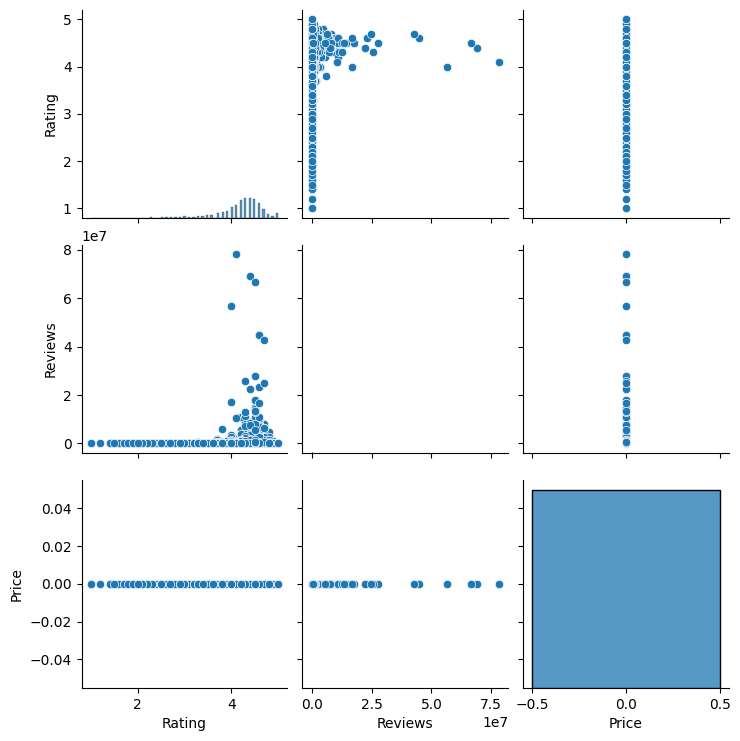

In [8]:
sns.pairplot(data)

In [10]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data[["Rating", "Reviews", "Price"]])
cat_enc_oe

array([[2.900e+01, 1.590e+02, 0.000e+00],
       [2.700e+01, 7.060e+02, 0.000e+00],
       [3.500e+01, 3.761e+03, 0.000e+00],
       ...,
       [      nan, 3.000e+00, 0.000e+00],
       [3.300e+01, 1.140e+02, 0.000e+00],
       [3.300e+01, 4.745e+03, 0.000e+00]])

In [11]:
data_enc = pd.DataFrame(data=cat_enc_oe, index=data.index, columns=["Rating", "Reviews", "Price"])
data_enc.head()

,Rating,Reviews,Price
0,29.0,159.0,0.0
1,27.0,706.0,0.0
2,35.0,3761.0,0.0
3,33.0,4370.0,0.0
4,31.0,706.0,0.0


In [12]:
data_enc["Price"].unique()

array([0.])

In [13]:
data_enc = data_enc.drop(columns=['Reviews', 'Price'])

data_enc = data_enc.join(data[["Reviews"]])
data_enc = data_enc.join(data[["Price"]])

data_enc


,Rating,Reviews,Price
0,29.0,159.0,0.0
1,27.0,967.0,0.0
2,35.0,87510.0,0.0
3,33.0,215644.0,0.0
4,31.0,967.0,0.0
...,...,...,...
10836,33.0,38.0,0.0
10837,38.0,4.0,0.0
10838,NaN,3.0,0.0
10839,33.0,114.0,0.0


In [14]:
corr_matrix = data_enc.corr()

In [15]:
corr_matrix

,Rating,Reviews,Price
Rating,1.000000,0.072914,NaN
Reviews,0.072914,1.000000,NaN
Price,NaN,NaN,NaN


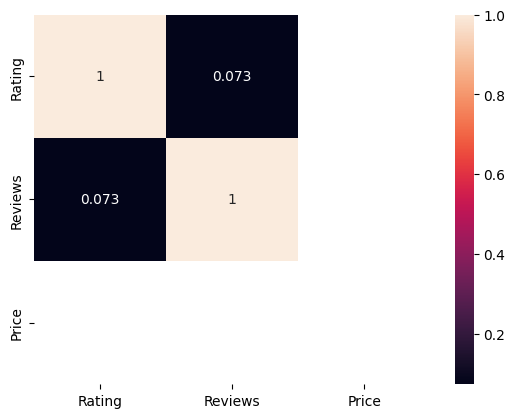

In [16]:
heatmap = sns.heatmap(corr_matrix, annot=True)

## Доп задание

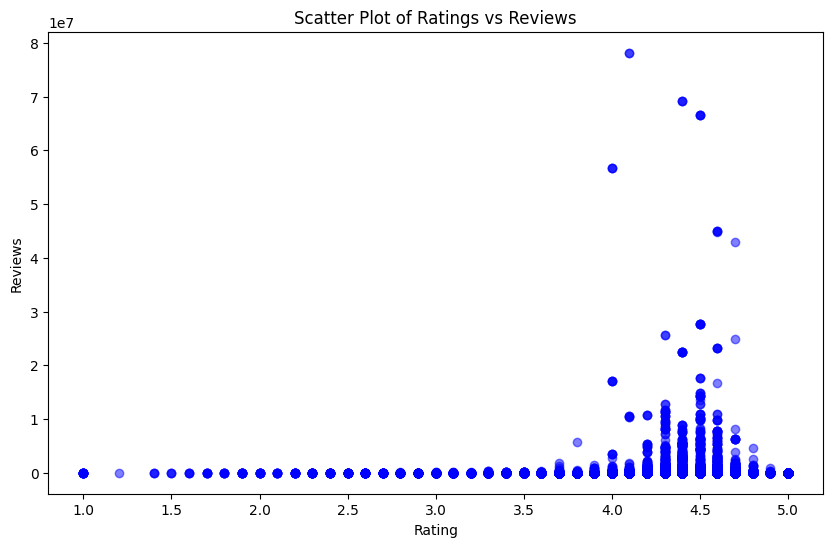

In [21]:
# Выбор произвольных колонок данных
x = data["Rating"]
y = data["Reviews"]

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title("Scatter Plot of Ratings vs Reviews")
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.show()

На основании корреляционного анализа можно сделать выводы:
- Корреляция между признаками почти отсутствует
- Нельзя выделять влияние чего-либо ввиду недостатка категориальных признаков.
- Придется создавать новые признаки на основе имеющихся